# XGBoost model for UKb feature set with 40% missing data cutoff

## Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
              
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, roc_curve
from sklearn.utils import resample

import xgboost as xgb
from xgboost import plot_importance

## Directory

In [2]:
os.chdir("/rds/general/project/hda_students_data/live/Group9/General/Data/Final_final_final_datasets/UKb40")

## Load in data

### UKb column names

In [3]:
UKb_col_names = pd.read_csv("../../../James/TDS_project/Scripts/lazy_predict_scripts/fourty_colnames.csv")

In [4]:
ls_UKb_cols = ["X54.0.0"]
for i in UKb_col_names[:291].values:
    i = str(i)
    i = i.replace("[", "")
    i = i.replace("]", "")
    i = i.replace("'", "")
    ls_UKb_cols.append(i)

UKb_col_count = len(ls_UKb_cols)

### UKB feature set

In [5]:
cols = pd.read_csv("../../1_3_5_10_hes/hes_10yr_A00Z99_bin.csv")
ICD_10yr_cols = cols.columns[5:]
col_count = len(ICD_10yr_cols)

In [6]:
X_train = pd.read_csv("X_train_10yr_UKb40_A00toZ99_bin.csv")
Y_train = pd.read_csv("Y_train_10yr_UKb40_A00toZ99_bin.csv")
X_test = pd.read_csv("X_test_10yr_UKb40_A00toZ99_bin.csv")
Y_test = pd.read_csv("Y_test_10yr_UKb40_A00toZ99_bin.csv")

In [7]:
names = X_train.columns.tolist() 
names[-col_count:] = ICD_10yr_cols
X_train.columns = names

names = X_test.columns.tolist() 
names[-col_count:] = ICD_10yr_cols
X_test.columns = names

In [8]:
names = X_train.columns.tolist()
end = UKb_col_count +1
names[1:end] = ls_UKb_cols
X_train.columns = names

names = X_test.columns.tolist() 
names[1:end] = ls_UKb_cols
X_test.columns = names

In [10]:
UKb_col_count

292

In [11]:
X_train = X_train.drop(["Unnamed: 0"], axis = 1)
X_test = X_test.drop(["Unnamed: 0"], axis = 1)

X_train_UKb = X_train.iloc[:, 0:292]
X_test_UKb = X_test.iloc[:, 0:292]

In [15]:
Y_train_UKb = Y_train
Y_test_UKb = Y_test

In [21]:
Y_train_UKb = Y_train_UKb.drop(["Unnamed: 0"], axis = 1)
Y_test_UKb = Y_test_UKb.drop(["Unnamed: 0"], axis = 1)

### 10 year time window

In [28]:
cols = pd.read_csv("../../1_3_5_10_hes/hes_10yr_A00Z99_bin.csv")
ICD_10yr_cols = cols.columns[5:]
col_count = len(ICD_10yr_cols)

In [29]:
X_train_10yr = pd.read_csv("X_train_10yr_UKb40_A00toZ99_bin.csv")
Y_train_10yr = pd.read_csv("Y_train_10yr_UKb40_A00toZ99_bin.csv")
X_test_10yr = pd.read_csv("X_test_10yr_UKb40_A00toZ99_bin.csv")
Y_test_10yr = pd.read_csv("Y_test_10yr_UKb40_A00toZ99_bin.csv")

In [30]:
names = X_train_10yr.columns.tolist() 
names[-col_count:] = ICD_10yr_cols
X_train_10yr.columns = names

names = X_test_10yr.columns.tolist() 
names[-col_count:] = ICD_10yr_cols
X_test_10yr.columns = names

In [31]:
names = X_train_10yr.columns.tolist()
end = UKb_col_count +1
names[1:end] = ls_UKb_cols
X_train_10yr.columns = names

names = X_test_10yr.columns.tolist() 
names[1:end] = ls_UKb_cols
X_test_10yr.columns = names

### 5 year time window

In [32]:
cols = pd.read_csv("../../1_3_5_10_hes/hes_5yr_A00Z99_bin.csv")
ICD_5yr_cols = cols.columns[5:]
col_count = len(ICD_5yr_cols)

In [33]:
X_train_5yr = pd.read_csv("X_train_5yr_UKb40_A00toZ99_bin.csv")
Y_train_5yr = pd.read_csv("Y_train_5yr_UKb40_A00toZ99_bin.csv")
X_test_5yr = pd.read_csv("X_test_5yr_UKb40_A00toZ99_bin.csv")
Y_test_5yr = pd.read_csv("Y_test_5yr_UKb40_A00toZ99_bin.csv")

In [34]:
names = X_train_5yr.columns.tolist() 
names[-col_count:] = ICD_5yr_cols
X_train_5yr.columns = names

names = X_test_5yr.columns.tolist() 
names[-col_count:] = ICD_5yr_cols
X_test_5yr.columns = names

In [35]:
names = X_train_5yr.columns.tolist()
end = UKb_col_count +1
names[1:end] = ls_UKb_cols
X_train_5yr.columns = names

names = X_test_5yr.columns.tolist() 
names[1:end] = ls_UKb_cols
X_test_5yr.columns = names

### 3 year time window

In [36]:
cols = pd.read_csv("../../1_3_5_10_hes/hes_3yr_A00Z99_bin.csv")
ICD_3yr_cols = cols.columns[5:]
col_count = len(ICD_3yr_cols)

In [37]:
X_train_3yr = pd.read_csv("X_train_3yr_UKb40_A00toZ99_bin.csv")
Y_train_3yr = pd.read_csv("Y_train_3yr_UKb40_A00toZ99_bin.csv")
X_test_3yr = pd.read_csv("X_test_3yr_UKb40_A00toZ99_bin.csv")
Y_test_3yr = pd.read_csv("Y_test_3yr_UKb40_A00toZ99_bin.csv")

In [38]:
names = X_train_3yr.columns.tolist() 
names[-col_count:] = ICD_3yr_cols
X_train_3yr.columns = names

names = X_test_3yr.columns.tolist() 
names[-col_count:] = ICD_3yr_cols
X_test_3yr.columns = names

In [39]:
names = X_train_3yr.columns.tolist()
end = UKb_col_count +1
names[1:end] = ls_UKb_cols
X_train_3yr.columns = names

names = X_test_3yr.columns.tolist() 
names[1:end] = ls_UKb_cols
X_test_3yr.columns = names

### 1 year time window

In [40]:
cols = pd.read_csv("../../1_3_5_10_hes/hes_1yr_A00Z99_bin.csv")
ICD_1yr_cols = cols.columns[5:]
col_count = len(ICD_1yr_cols)

In [41]:
X_train_1yr = pd.read_csv("X_train_1yr_UKb40_A00toZ99_bin.csv")
Y_train_1yr = pd.read_csv("Y_train_1yr_UKb40_A00toZ99_bin.csv")
X_test_1yr = pd.read_csv("X_test_1yr_UKb40_A00toZ99_bin.csv")
Y_test_1yr = pd.read_csv("Y_test_1yr_UKb40_A00toZ99_bin.csv")

In [42]:
names = X_train_1yr.columns.tolist() 
names[-col_count:] = ICD_1yr_cols
X_train_1yr.columns = names

names = X_test_1yr.columns.tolist() 
names[-col_count:] = ICD_1yr_cols
X_test_1yr.columns = names

In [43]:
names = X_train_1yr.columns.tolist()
end = UKb_col_count +1
names[1:end] = ls_UKb_cols
X_train_1yr.columns = names

names = X_test_1yr.columns.tolist() 
names[1:end] = ls_UKb_cols
X_test_1yr.columns = names

#### Check shapes

In [21]:
print(X_train_10yr.shape)
print(Y_train_10yr.shape)
print(X_test_10yr.shape)
print(Y_test_10yr.shape)

(14855, 1576)
(14855, 2)
(3957, 1576)
(3957, 2)


In [22]:
print(X_train_5yr.shape)
print(Y_train_5yr.shape)
print(X_test_5yr.shape)
print(Y_test_5yr.shape)

(14855, 1462)
(14855, 2)
(3957, 1462)
(3957, 2)


In [23]:
print(X_train_3yr.shape)
print(Y_train_3yr.shape)
print(X_test_3yr.shape)
print(Y_test_3yr.shape)

(14855, 1380)
(14855, 2)
(3957, 1380)
(3957, 2)


In [24]:
print(X_train_1yr.shape)
print(Y_train_1yr.shape)
print(X_test_1yr.shape)
print(Y_test_1yr.shape)

(14855, 1144)
(14855, 2)
(3957, 1144)
(3957, 2)


In [44]:
X_train_10yr = X_train_10yr.drop("Unnamed: 0", axis = 1)
Y_train_10yr = Y_train_10yr.drop("Unnamed: 0", axis = 1)
X_test_10yr = X_test_10yr.drop("Unnamed: 0", axis = 1)
Y_test_10yr = Y_test_10yr.drop("Unnamed: 0", axis = 1)

X_train_5yr = X_train_5yr.drop("Unnamed: 0", axis = 1)
Y_train_5yr = Y_train_5yr.drop("Unnamed: 0", axis = 1)
X_test_5yr = X_test_5yr.drop("Unnamed: 0", axis = 1)
Y_test_5yr = Y_test_5yr.drop("Unnamed: 0", axis = 1)

X_train_3yr = X_train_3yr.drop("Unnamed: 0", axis = 1)
Y_train_3yr = Y_train_3yr.drop("Unnamed: 0", axis = 1)
X_test_3yr = X_test_3yr.drop("Unnamed: 0", axis = 1)
Y_test_3yr = Y_test_3yr.drop("Unnamed: 0", axis = 1)

X_train_1yr = X_train_1yr.drop("Unnamed: 0", axis = 1)
Y_train_1yr = Y_train_1yr.drop("Unnamed: 0", axis = 1)
X_test_1yr = X_test_1yr.drop("Unnamed: 0", axis = 1)
Y_test_1yr = Y_test_1yr.drop("Unnamed: 0", axis = 1)

In [26]:
X_train_1yr.head()

,X54.0.0,X21003.0.0,X21022.0.0,X52.0.0,X34.0.0,X31.0.0,X3137.0.0,X3140.0.0,X3143.0.0,X3144.0.0,...,Z90,Z91,Z92,Z93,Z94,Z95,Z96,Z97,Z98,Z99
0,11014.0,64.0,64.0,8.0,1945.0,0.0,3.0,0.000000,43.988409,77.132304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11007.0,70.0,70.0,1.0,1938.0,1.0,3.0,0.002798,48.736000,78.863000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11007.0,53.0,53.0,3.0,1955.0,1.0,3.0,0.002798,52.811000,81.674000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11013.0,41.0,41.0,10.0,1967.0,0.0,2.0,0.000000,39.599000,67.181000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11008.0,63.0,63.0,3.0,1945.0,1.0,3.0,0.002798,46.655000,110.336000,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [27]:
Y_train_1yr.head()

,casecont
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [20]:
Y_train_UKb

,Unnamed: 0,casecont
0,0,0.0
1,1,1.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
14850,14850,1.0
14851,14851,1.0
14852,14852,1.0
14853,14853,1.0


## XGBoost Models

In [62]:
ls_cols_to_ignore = ["X40019.0.0", "X20004.0.0", "C44", "X40008.0.0.y", "X40009.0.0.y", "X134.0.0", "X2453.0.0", "X20004.0.1"]
ls_cols_to_ignore_UKb = ["X40019.0.0", "X20004.0.0", "X40008.0.0.y", "X40009.0.0.y", "X134.0.0", "X2453.0.0", "X20004.0.1"]

#### Baseline models

In [22]:
model = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, min_child_weight = 6, subsample = 0.5)
model.fit(X_train_UKb.drop(ls_cols_to_ignore_UKb, axis = 1), Y_train_UKb)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
train_score = round(model.score(X_train_UKb.drop(ls_cols_to_ignore_UKb, axis = 1), Y_train_UKb), 5)
test_score = round(model.score(X_test_UKb.drop(ls_cols_to_ignore_UKb, axis = 1), Y_test_UKb), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.76405
Testing accuracy => 0.68385


In [47]:
eval_set = [(X_test_1yr.drop(ls_cols_to_ignore, axis = 1), Y_test_1yr)]

model_1yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, min_child_weight = 6, subsample = 0.5, n_estimators = 100)
model_1yr.fit(X_train_1yr.drop(ls_cols_to_ignore, axis = 1), Y_train_1yr, eval_metric = "auc", eval_set = eval_set, verbose = True)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-auc:0.59393
[1]	validation_0-auc:0.60342
[2]	validation_0-auc:0.62170
[3]	validation_0-auc:0.62547
[4]	validation_0-auc:0.62518
[5]	validation_0-auc:0.62783
[6]	validation_0-auc:0.62922
[7]	validation_0-auc:0.63733
[8]	validation_0-auc:0.63930
[9]	validation_0-auc:0.63874
[10]	validation_0-auc:0.64271
[11]	validation_0-auc:0.64398
[12]	validation_0-auc:0.64636
[13]	validation_0-auc:0.64863
[14]	validation_0-auc:0.65181
[15]	validation_0-auc:0.65409
[16]	validation_0-auc:0.65353
[17]	validation_0-auc:0.65455
[18]	validation_0-auc:0.65499
[19]	validation_0-auc:0.65558
[20]	validation_0-auc:0.65892
[21]	validation_0-auc:0.65988
[22]	validation_0-auc:0.66050
[23]	validation_0-auc:0.66041
[24]	validation_0-auc:0.66133
[25]	validation_0-auc:0.66235
[26]	validation_0-auc:0.66278
[27]	validation_0-auc:0.66263
[28]	validation_0-auc:0.66457
[29]	validation_0-auc:0.66448
[30]	validation_0-auc:0.66409
[31]	validation_0-auc:0.66456
[32]	validation_0-auc:0.66438
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
train_score = round(model_1yr.score(X_train_1yr.drop(ls_cols_to_ignore, axis = 1), Y_train_1yr), 5)
test_score = round(model_1yr.score(X_test_1yr.drop(ls_cols_to_ignore, axis = 1), Y_test_1yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.77085
Testing accuracy => 0.69371


In [49]:
model_3yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, min_child_weight = 6, subsample = 0.5)
model_3yr.fit(X_train_3yr.drop(ls_cols_to_ignore, axis = 1), Y_train_3yr)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
train_score = round(model_3yr.score(X_train_3yr.drop(ls_cols_to_ignore, axis = 1), Y_train_3yr), 5)
test_score = round(model_3yr.score(X_test_3yr.drop(ls_cols_to_ignore, axis = 1), Y_test_3yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.77004
Testing accuracy => 0.69194


In [51]:
model_5yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, min_child_weight = 6, subsample = 0.5)
model_5yr.fit(X_train_5yr.drop(ls_cols_to_ignore, axis = 1), Y_train_5yr)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
train_score = round(model_5yr.score(X_train_5yr.drop(ls_cols_to_ignore, axis = 1), Y_train_5yr), 5)
test_score = round(model_5yr.score(X_test_5yr.drop(ls_cols_to_ignore, axis = 1), Y_test_5yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.77038
Testing accuracy => 0.69118


In [53]:
model_10yr = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, min_child_weight = 6, subsample = 0.5)
model_10yr.fit(X_train_10yr.drop(ls_cols_to_ignore, axis = 1), Y_train_10yr)

/rds/general/user/jmp420/home/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
train_score = round(model_10yr.score(X_train_10yr.drop(ls_cols_to_ignore, axis = 1), Y_train_10yr), 5)
test_score = round(model_10yr.score(X_test_10yr.drop(ls_cols_to_ignore, axis = 1), Y_test_10yr), 5)

print(f"Training accuracy => {train_score}")
print(f"Testing accuracy => {test_score}")

Training accuracy => 0.77267
Testing accuracy => 0.68891


## Plot the ROC curves

#### This is the code to build the roc curve plot, will need more results obviously, but shouldn't take too long to extend this code!

In [60]:
result_table = pd.DataFrame(columns=['Time window', 'fpr','tpr','auc'])

In [63]:
yproba = model.predict_proba(X_test_UKb.drop(ls_cols_to_ignore_UKb, axis = 1))[::,1]
fpr, tpr, _ = roc_curve(Y_test_UKb,  yproba)
auc = roc_auc_score(Y_test_UKb, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [64]:
yproba = model_1yr.predict_proba(X_test_1yr.drop(ls_cols_to_ignore, axis = 1))[::,1]
fpr, tpr, _ = roc_curve(Y_test_1yr,  yproba)
auc = roc_auc_score(Y_test_1yr, yproba)

result_table = result_table.append({'Time window':"1 year",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

yproba = model_3yr.predict_proba(X_test_3yr.drop(ls_cols_to_ignore, axis = 1))[::,1]
fpr, tpr, _ = roc_curve(Y_test_3yr,  yproba)
auc = roc_auc_score(Y_test_3yr, yproba)

result_table = result_table.append({'Time window':"3 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

yproba = model_5yr.predict_proba(X_test_5yr.drop(ls_cols_to_ignore, axis = 1))[::,1]
fpr, tpr, _ = roc_curve(Y_test_5yr,  yproba)
auc = roc_auc_score(Y_test_5yr, yproba)

result_table = result_table.append({'Time window':"5 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

yproba = model_10yr.predict_proba(X_test_10yr.drop(ls_cols_to_ignore, axis = 1))[::,1]
fpr, tpr, _ = roc_curve(Y_test_10yr,  yproba)
auc = roc_auc_score(Y_test_10yr, yproba)

result_table = result_table.append({'Time window':"10 years",
                                    'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

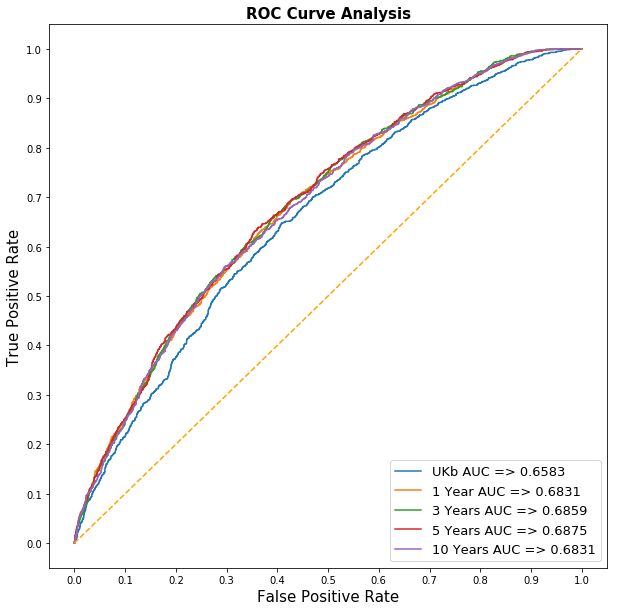

In [65]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(result_table.fpr[0], result_table.tpr[0], label="UKb AUC => " + str(round(result_table.auc[0], 4)))
plt.plot(result_table.fpr[1], result_table.tpr[1], label="1 Year AUC => " + str(round(result_table.auc[1], 4)))
plt.plot(result_table.fpr[2], result_table.tpr[2], label="3 Years AUC => " + str(round(result_table.auc[2], 4)))
plt.plot(result_table.fpr[3], result_table.tpr[3], label="5 Years AUC => " + str(round(result_table.auc[3], 4)))
plt.plot(result_table.fpr[4], result_table.tpr[4], label="10 Years AUC => " + str(round(result_table.auc[4], 4)))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Extract important features

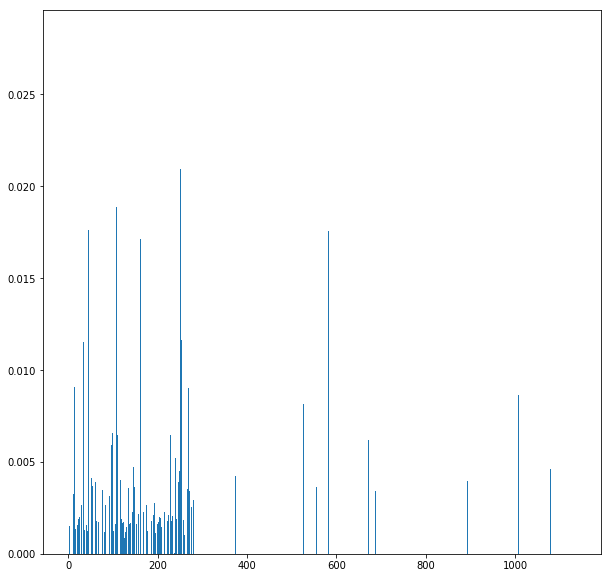

In [204]:
plt.bar(range(len(model_1yr.feature_importances_)), model_1yr.feature_importances_)
plt.show()

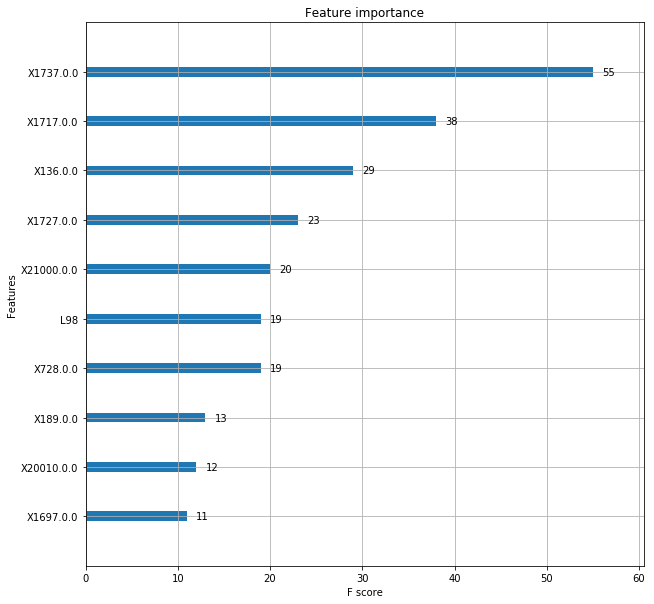

In [148]:
plot_importance(model_1yr, max_num_features=10)
plt.show()

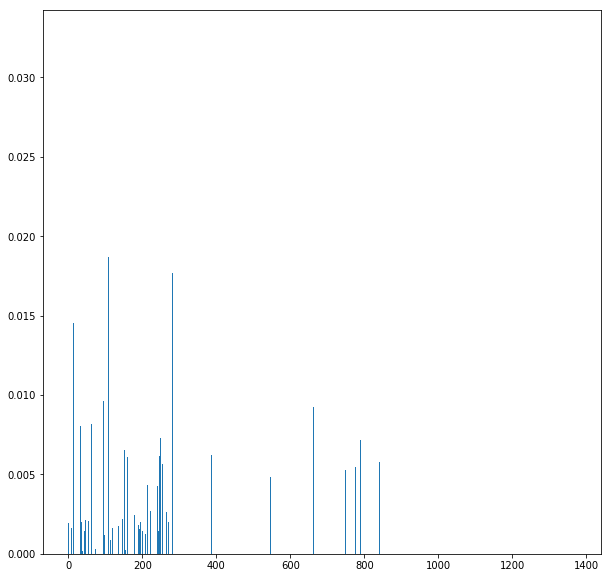

In [149]:
plt.bar(range(len(model_3yr.feature_importances_)), model_3yr.feature_importances_)
plt.show()

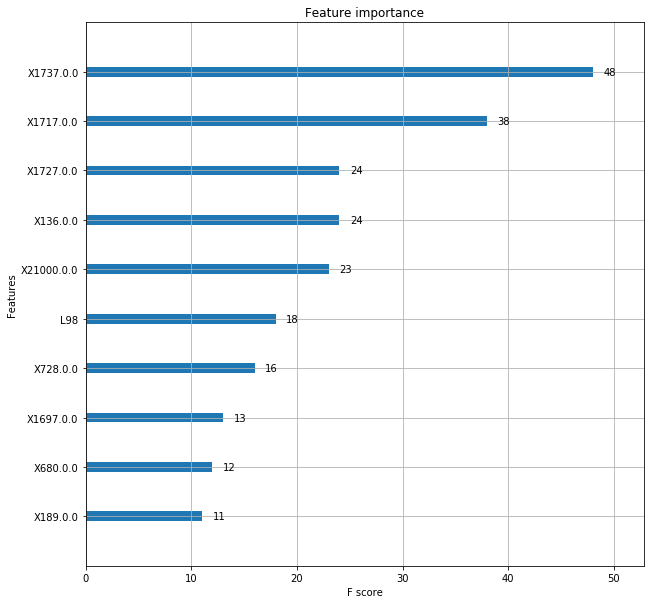

In [150]:
plot_importance(model_3yr, max_num_features=10)
plt.show()

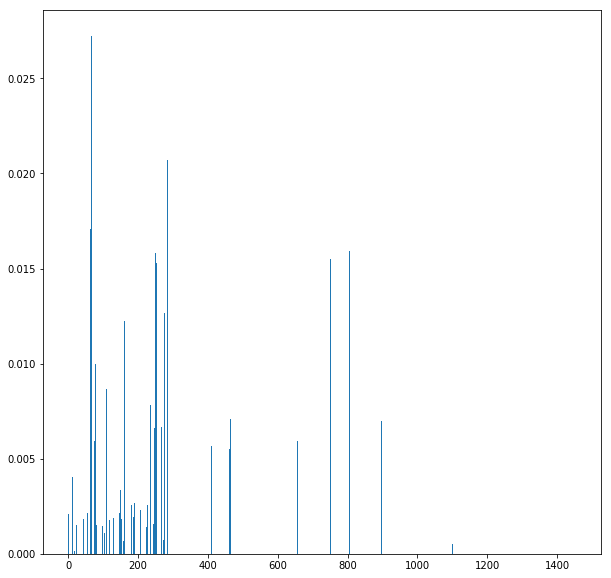

In [151]:
plt.bar(range(len(model_5yr.feature_importances_)), model_5yr.feature_importances_)
plt.show()

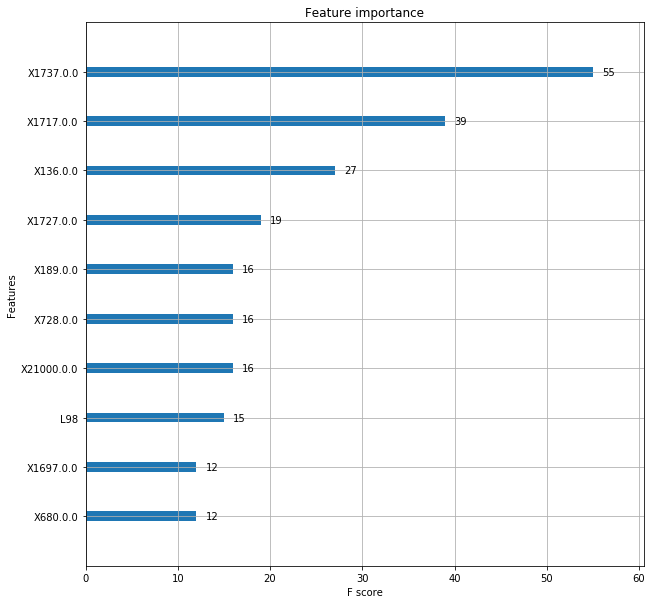

In [152]:
plot_importance(model_5yr, max_num_features=10)
plt.show()

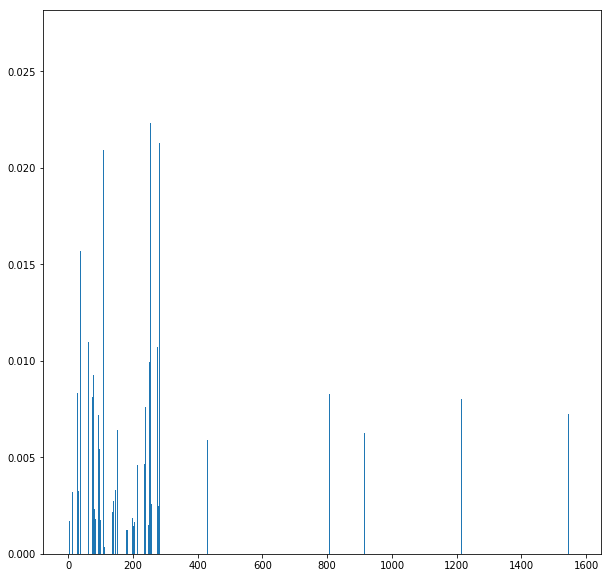

In [153]:
plt.bar(range(len(model_10yr.feature_importances_)), model_10yr.feature_importances_)
plt.show()

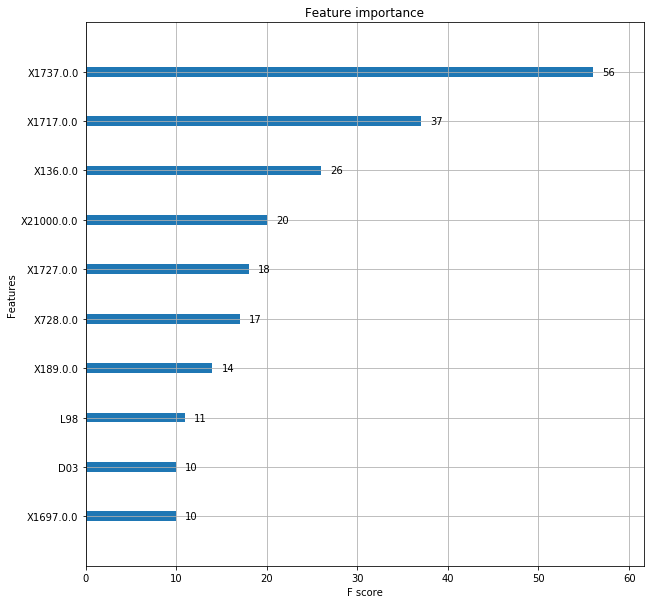

In [154]:
plot_importance(model_10yr, max_num_features=10)
plt.show()

### Top predictors before selecting features for removal (1year)
#### 1. cancer record format
#### 2. number of self reported cancers
#### 3. operation code
#### 4. reported occurences of cancer
#### 5. Age at cancer diagnosis
#### 6. ICD-10-CM Code L98 - Other disorders of skin and subcutaneous tissue
#### 7. skin colour
#### 8. ICD-10-CM Code C44 - Other and unspecified malignant neoplasm of skin
#### 9. childhood sunburn
#### 10. average household income

### Top predictors after selecting features for removal (1year)
#### 1. Childhood sunburn occasions
#### 2. Skin colour
#### 3. Number of operations
#### 4. Ease of skin tanning
#### 5. Ethnic background
#### 6. ICD-10-CM Code L98 - Other disorders of skin and subcutaneous tissue
#### 7. Number of vehicles in household
#### 8. Townsend deprivation score
#### 9. Interpolated year of operation
#### 10. Comparative height size at age 10 